Original Image


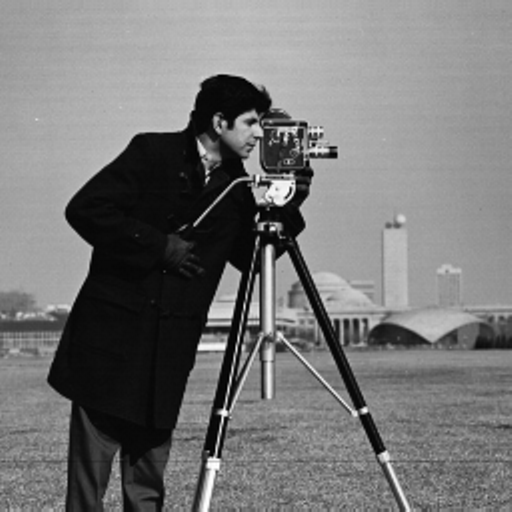

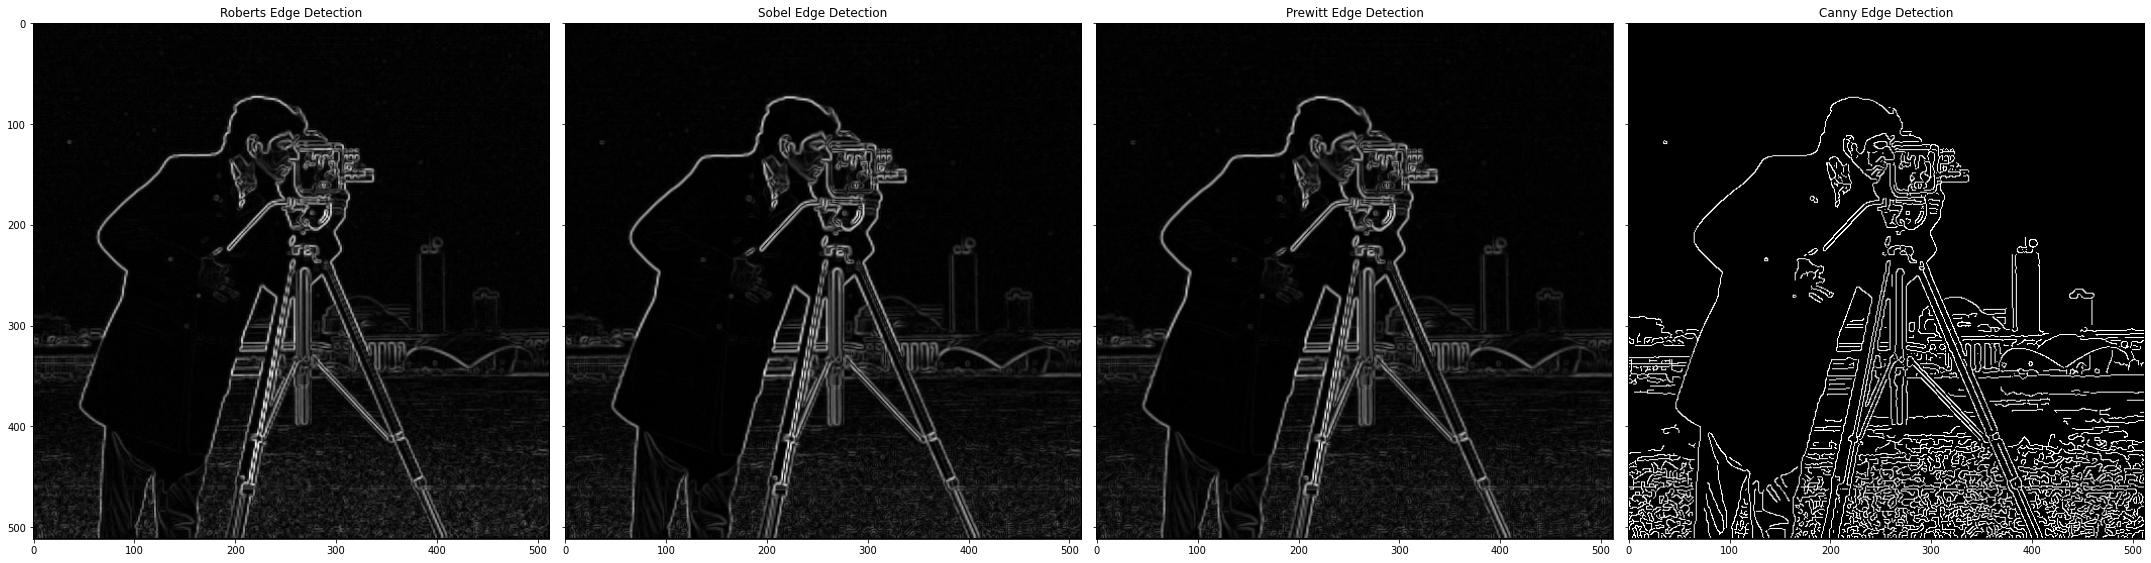

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import camera 
from skimage.filters import roberts, sobel, scharr, prewitt,sobel
from skimage.feature import canny
from google.colab.patches import cv2_imshow
import cv2


image=camera()
print('Original Image')
cv2_imshow(image)

edge_roberts = roberts(image)
edge_sobel= sobel(image)
edge_prewitt= prewitt(image)
edge_canny=canny(image,sigma=1)


fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True,
                         figsize=(30, 30))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

axes[2].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[2].set_title('Prewitt Edge Detection')

axes[3].imshow(edge_canny, cmap=plt.cm.gray)
axes[3].set_title('Canny Edge Detection')


plt.tight_layout()
plt.show()

Laplacian of Given Image


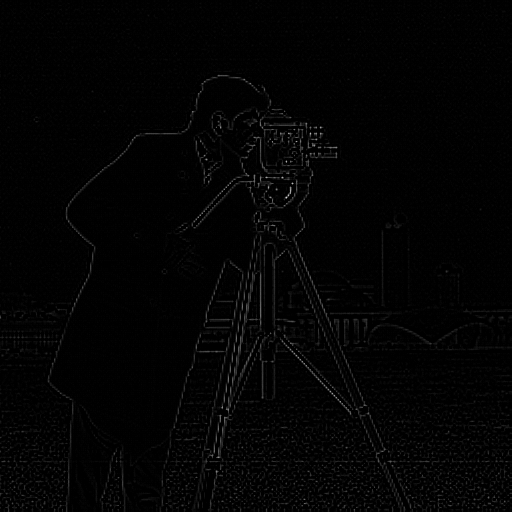

In [4]:
print('Laplacian of Given Image')
cv2_imshow(cv2.Laplacian(image,cv2.CV_64F))

Applied a 3,3 Gausian Filter and then passed imaged through Laplacian Mask


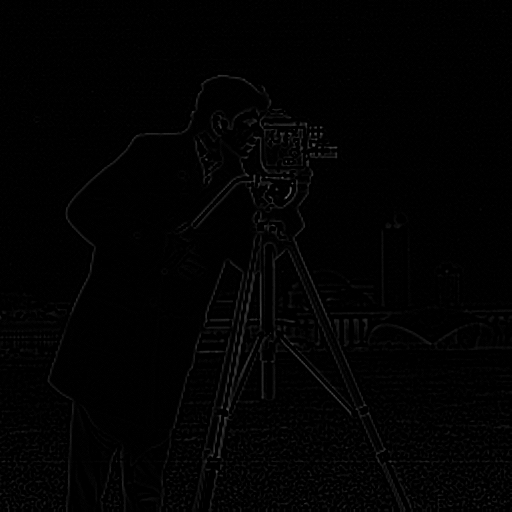

In [5]:
print('Applied a 3,3 Gausian Filter and then passed imaged through Laplacian Mask')
cv2_imshow(cv2.Laplacian(cv2.GaussianBlur(image,(3,3),0),cv2.CV_64F))

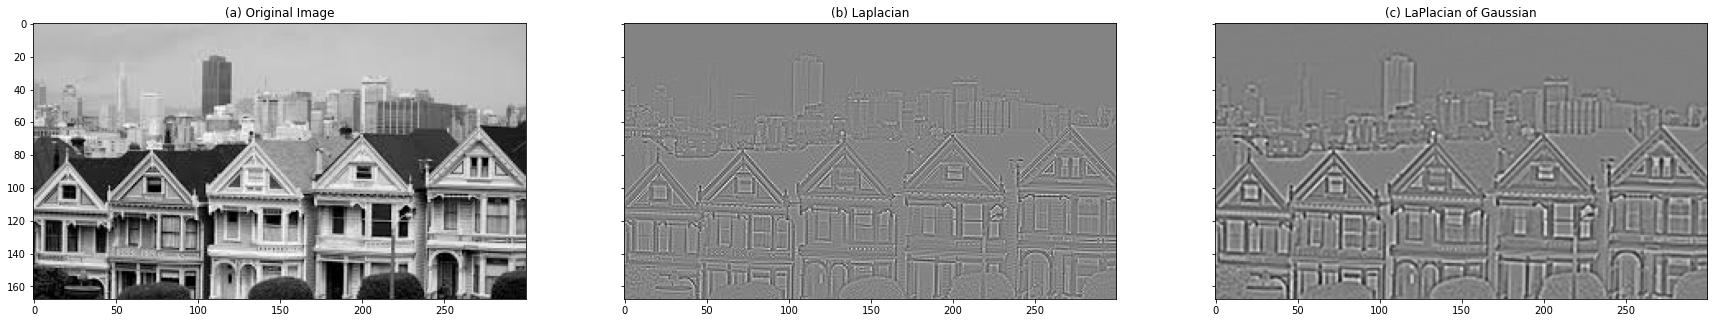

This image shows how appyling LoG clearly defines the edges of the image 


In [53]:
imgpath='/content/SanFrancisco.jpg'
img=cv2.imread(imgpath)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(30, 30))
axes[0].imshow(gray, cmap=plt.cm.gray)
axes[0].set_title('(a) Original Image')


axes[1].imshow(cv2.Laplacian(gray,cv2.CV_64F), cmap=plt.cm.gray)
axes[1].set_title('(b) Laplacian')

img = cv2.GaussianBlur(gray,(3,3),0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)


axes[2].imshow(laplacian, cmap=plt.cm.gray)
axes[2].set_title('(c) LaPlacian of Gaussian')

plt.show()

print('This image shows how appyling LoG clearly defines the edges of the image ')

In [27]:
imgpath='/content/SanFrancisco.jpg'
img=cv2.imread(imgpath)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray,cv2.CV_64F)



In [33]:
sharpened_img=gray+laplacian

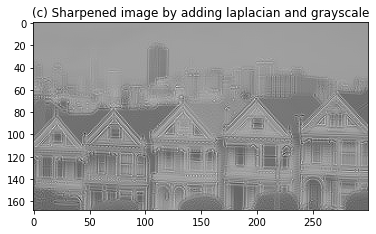

In [51]:

plt.imshow(sharpened_img, cmap=plt.cm.gray)
plt.title('(c) Sharpened image by adding laplacian and grayscale')
plt.show()

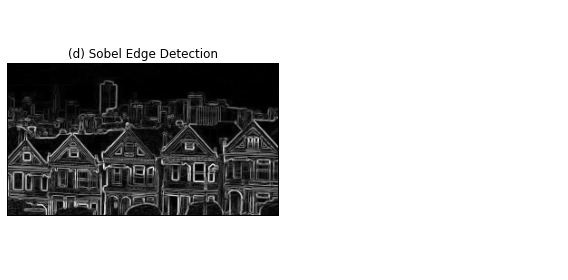

In [52]:

edge_sobel=sobel(gray)
fig,axes= plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
axes[0].imshow(edge_sobel, cmap=plt.cm.gray)
axes[0].set_title('(d) Sobel Edge Detection')
for ax in axes:
    ax.axis('off')
plt.tight_layout()


plt.show()

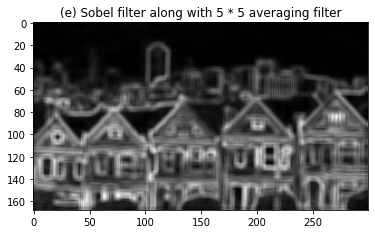

In [49]:

edge_sobel_filter = cv2.blur(edge_sobel,(5,5))
plt.imshow(edge_sobel_filter, cmap=plt.cm.gray)
plt.title('(e) Sobel filter along with 5 * 5 averaging filter')
plt.show()

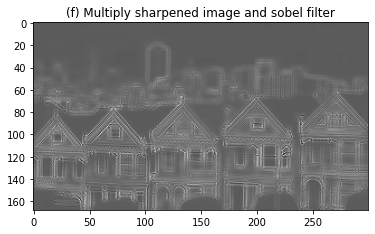

In [48]:
res_e=sharpened_img * edge_sobel_filter
plt.imshow(res_e,cmap=plt.cm.gray)
plt.title('(f) Multiply sharpened image and sobel filter')
plt.show()

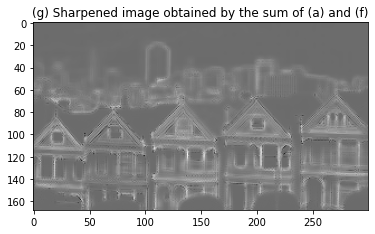

In [47]:
plt.imshow(gray * res_e,cmap=plt.cm.gray)
plt.title('(g) Sharpened image obtained by the sum of (a) and (f)')
plt.show()